# Oracle: Median Following

Keeps the car on the track median with variable look ahead time.

In [46]:
from DriveItGym import *
import numpy as np
from numpy import pi

num_episodes = 1  # number of episodes to run
time_limit = 10.0
throttle_limit = 1.0
gamma = 0.98
epsilon = 0.0
look_ahead = 0.22
kp = np.array((0.1, 1.0, 0.1)) # lateral, heading, steer
kb = -0.2

env = DriveItEnv(time_limit, throttle_limit, gamma, trail_length=2.4)
observation = env.reset()
done = False
reward_episode = 0
reward_sum = 0.0
trace = []

for i_episode in range(1, num_episodes + 1):
    while not done:
        if num_episodes < 2:
            env.render()

        _, _, _, b_rl = observation
        err = env.median_error(look_ahead)
        trace.append(err)
        f = np.inner(kp, err) + kb * b_rl
        if np.abs(f) <= 0.02:
            action = 0 if np.random.uniform() >= epsilon else np.random.randint(0, 2)
        elif f > 0: action = 2 if np.random.uniform() >= epsilon else 0
        else: action = 1 if np.random.uniform() >= epsilon else 0

        observation, reward, done, info = env.step(action)
        reward_episode += reward

    if num_episodes <= 10:
        print('Episode %d %s. reward: %f, laps: %f' % \
              (i_episode, info['done'], reward_episode, \
               reward_episode / lap_median_length))
    reward_sum += reward_episode
    reward_episode = 0
    observation = env.reset()
    done = False

print('Average reward: %f' %(reward_sum / num_episodes))

Episode 1 complete. reward: 21.728337, laps: 4.316066
Average reward: 21.728337


In [47]:
env.close()

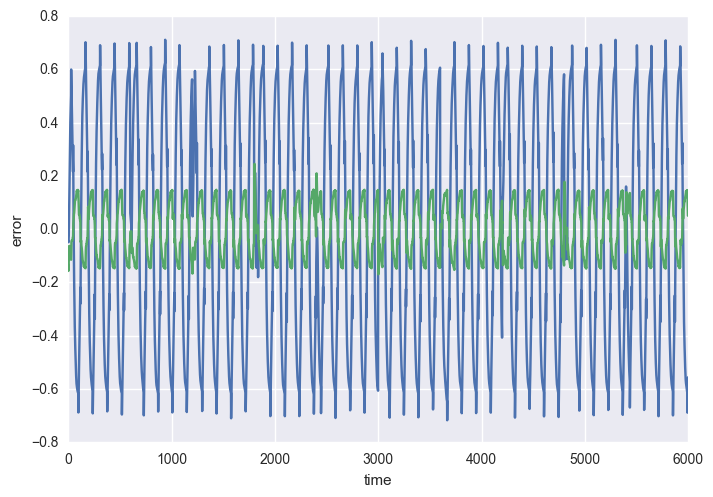

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline
sns.set()
plt.plot([t[0] for t in trace])
plt.plot([t[1] for t in trace])
#plt.plot(trace)
plt.xlabel('time');plt.ylabel('error')

In [13]:
env.reset()

array([-0.58652325,  0.06535034,  5.68388844,  0.        , -0.02745098])

In [14]:
env.render()